In [25]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Load training data
raw_data = np.loadtxt('./data/train.csv', dtype=int, delimiter=',', skiprows = 1, max_rows = 20)
without_labels = raw_data[:,1:]
labels = raw_data[:,0]

In [27]:
# Verify that the data loads correctly
print(without_labels.shape)
print(labels.shape)

(20, 784)
(20,)


(28, 28)
the label is 5


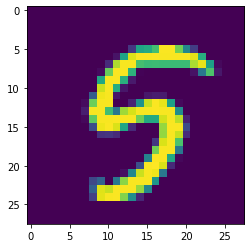

In [28]:
# taking a look at the Nth data point
n = 8
first_row = without_labels[n]
first_row = first_row.reshape((28,28))
print(first_row.shape)
print(f"the label is {labels[n]}")
plt.imshow(first_row)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

from sklearn.model_selection import StratifiedKFold

In [30]:
skf = StratifiedKFold(n_splits=4, shuffle=True)
train_id, test_id = 0, 0
for train_index, test_index in skf.split(without_labels, labels):
    print(train_index, test_index)
    train_id, test_id = train_index, test_index

[ 0  1  2  4  5  6  7 10 11 13 14 15 16 18 19] [ 3  8  9 12 17]
[ 0  1  2  3  5  8  9 11 12 13 14 16 17 18 19] [ 4  6  7 10 15]
[ 0  3  4  5  6  7  8  9 10 12 13 15 16 17 19] [ 1  2 11 14 18]
[ 1  2  3  4  6  7  8  9 10 11 12 14 15 17 18] [ 0  5 13 16 19]


/home/kimsk132/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


In [35]:
train_loader = data.DataLoader(raw_data[train_id,:], batch_size=5)

In [38]:
for d in train_loader:
    print(d[:,0],d[:,1:])

tensor([0, 1, 4, 0, 7]) tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([3, 5, 3, 8, 9]) tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([1, 3, 1, 0, 7]) tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
